# Baseline Scenario

In [ ]:
# import os

# # Measure Package 0: Baseline
# menu_mp = 0
# input_mp = 'baseline'

# # Get the current working directory of the project
# project_root = os.path.abspath(os.getcwd())
# print(f"Project root directory: {project_root}")

# # Relative path to the file from the project root
# relative_path = r"tare_model_scenario_baseline_v2.2.ipynb"

# # Construct the absolute path to the file
# file_path = os.path.join(project_root, relative_path)
# print(f"File path: {file_path}")

# # Run the notebook and import variables
# if os.path.exists(relative_path):
#     get_ipython().run_line_magic('run', f'-i "{relative_path}"')
#     print("Baseline Scenario - Model Run Complete")
# else:
#     print(f"File not found: {relative_path}")

# Basic Retrofit Scenarios (MP8)
- The dataframe for Measure Package 8 (MP8) will be used in the following scenarios:
    - Basic-BAU: Basic Retrofit (MP8), BAU Costs, Current Electricity Grid
    - Basic-IRA: Basic Retrofit (MP8), IRA Rebates, Current Electricity Grid
    - Basic-IRA-Decarb: Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid

## Dataframe for Electric Resistance Cooking (MP7)

In [ ]:
print(f"""
-------------------------------------------------------------------------------------------------------
We assume the use of Electric Resistance (MP7) rather than Induction (MP8).
Electric Resistance is significantly cheaper and only slightly less efficient than Induction.
-------------------------------------------------------------------------------------------------------
""")

# Measure Package 7
menu_mp = 7
input_mp = 'upgrade07'

filename = "upgrade07_metadata_and_annual_results.csv"
relative_path = os.path.join(r"euss_data\\resstock_amy2018_release_1.1\\state", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

# Fix DtypeWarning error in columns 'in.neighbors' and 'in.geometry_stories_low_rise'
columns_to_string = {11: str, 61: str, 121: str, 103: str, 128: str, 129: str}
df_euss_am_mp7 = pd.read_csv(file_path, dtype=columns_to_string)
occupancy_filter = df_euss_am_mp7['in.vacancy_status'] == 'Occupied'
df_euss_am_mp7 = df_euss_am_mp7.loc[occupancy_filter]

# Filter for single family home building type
house_type_list = ['Single-Family Attached', 'Single-Family Detached']
house_type_filter = df_euss_am_mp7['in.geometry_building_type_recs'].isin(house_type_list)
df_euss_am_mp7 = df_euss_am_mp7.loc[house_type_filter]

In [ ]:
# National Level 
if menu_state == 'N':
    print("You chose to analyze all of the United States.")
    input_state = 'National'

# Filter down to state or city
else:
    print(f"You chose to filter for: {input_state}")
    state_filter = df_euss_am_mp7['in.state'].eq(input_state)
    df_euss_am_mp7 = df_euss_am_mp7.loc[state_filter]

    # Filter for the entire selected state
    if menu_city == 'N':
        print(f"You chose to analyze all of state: {input_state}")
        
    # Filter to a city within the selected state
    else:
        print(f"You chose to filter for: {input_state}, {input_cityFilter}")
        city_filter = df_euss_am_mp7['in.city'].eq(f"{input_state}, {input_cityFilter}")
        df_euss_am_mp7 = df_euss_am_mp7.loc[city_filter]

# Display the filtered dataframe
df_euss_am_mp7

## Dataframe used for other end-uses (MP8)

In [ ]:
# Measure Package 8
menu_mp = 8
input_mp = 'upgrade08'
scenario_name = 'Basic-BAU'
cost_scenario = 'BAU Costs'
grid_scenario = 'Current Electricity Grid'

print(f"""
-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario {scenario_name}:
Basic Retrofit: Measure Package {menu_mp}
{cost_scenario}
{grid_scenario}
-------------------------------------------------------------------------------------------------------
""")

filename = "upgrade08_metadata_and_annual_results.csv"
relative_path = os.path.join(r"euss_data\\resstock_amy2018_release_1.1\\state", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

# Fix DtypeWarning error in columns 'in.neighbors' and 'in.geometry_stories_low_rise'
columns_to_string = {11: str, 61: str, 121: str, 103: str, 128: str, 129: str}
df_euss_am_mp8 = pd.read_csv(file_path, dtype=columns_to_string)
occupancy_filter = df_euss_am_mp8['in.vacancy_status'] == 'Occupied'
df_euss_am_mp8 = df_euss_am_mp8.loc[occupancy_filter]

# Filter for single family home building type
house_type_list = ['Single-Family Attached', 'Single-Family Detached']
house_type_filter = df_euss_am_mp8['in.geometry_building_type_recs'].isin(house_type_list)
df_euss_am_mp8 = df_euss_am_mp8.loc[house_type_filter]
# df_euss_am_mp8

In [ ]:
# National Level 
if menu_state == 'N':
    print("You chose to analyze all of the United States.")
    input_state = 'National'

# Filter down to state or city
else:
    print(f"You chose to filter for: {input_state}")
    state_filter = df_euss_am_mp8['in.state'].eq(input_state)
    df_euss_am_mp8 = df_euss_am_mp8.loc[state_filter]

    # Filter for the entire selected state
    if menu_city == 'N':
        print(f"You chose to analyze all of state: {input_state}")
        
    # Filter to a city within the selected state
    else:
        print(f"You chose to filter for: {input_state}, {input_cityFilter}")
        city_filter = df_euss_am_mp8['in.city'].eq(f"{input_state}, {input_cityFilter}")
        df_euss_am_mp8 = df_euss_am_mp8.loc[city_filter]

# Display the filtered dataframe
df_euss_am_mp8

### Post-Retrofit (MP) Consumption: WHOLE-HOME

In [ ]:
print("""
-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Consumption: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
""")

# df_enduse_compare(df_mp, category, df_baseline):
df_euss_am_mp8_home = df_enduse_compare(df_mp = df_euss_am_mp8,
                                        menu_mp=menu_mp,
                                        df_baseline = df_euss_am_baseline_home 
                                       )
df_euss_am_mp8_home

## Public Perspective: Monetized Marginal Damages from Emissions

In [ ]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Public Perspective: Monetized Marginal Damages from Emissions
------------------------------------------------------------------------------------------------------------------------------------------------
**Steps 1-4 were performed in the Baseline Scenario**
- Step 1: Calculate emissions factors for different fuel sources
- Step 2: Adjust Natural Gas & Electricity Emissions Factors for Natural Gas Leakage
- Step 3: Quantify monitized damages using EASIUR Marginal Social Cost Factors
- Step 4: Inflate Marginal Social Cost (Damage) Factors using BLS CPI for All Urban Consumers (CPI-U) 
------------------------------------------------------------------------------------------------------------------------------------------------
""")

### Step 5: Calculate End-use specific marginal damages
**I used the total emissions column for each of the end uses for the following reasons:**
- Most homes only have 1 of each end-use, so it is unlikely that the homes have a significant consumption values from different fuel types. Thus, the total consumption and total emissions column (sum of each dwelling units consumption by end-use for each fuel) is fine to use to calculate marginal damages (social cost)
- We can visualize the emissions in 2 by 2 grid (CO2, PM25, SO2, NOx) with each appliance's heating fuel in a different shape or color. 

In [ ]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Step 5: Calculate End-use specific marginal damages
------------------------------------------------------------------------------------------------------------------------------------------------
""")

### Post-Retrofit (MP) Marginal Damages: WHOLE-HOME

In [ ]:
print("""
-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Marginal Damages: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
""")

# td_losses = 0.06

# calculate_marginal_damages(df, grid_decarb=False)
df_euss_am_mp8_home = calculate_marginal_damages(df=df_euss_am_mp8_home,
                                                 grid_decarb=False
                                                )
df_euss_am_mp8_home

In [ ]:
# heating_df_cols = ['bldg_id', 'subregion_eGRID', 'base_heating_fuel','heating_type','base_heating_efficiency',
#                    'base_electricity_heating_consumption', 'base_fuelOil_heating_consumption', 'base_naturalGas_heating_consumption', 
#                    'base_propane_heating_consumption', 'baseline_heating_consumption',
#                    'margSocialCosts_so2','margDamage_factor_so2','margSocialCosts_nox','margDamage_factor_nox',
#                    'margSocialCosts_pm25','margDamage_factor_pm25','margSocialCosts_co2','margDamage_factor_co2',
#                    'baseline_heating_damages_so2','baseline_heating_damages_nox','baseline_heating_damages_pm25',
#                    'baseline_heating_damages_co2','baseline_heating_damages_health','baseline_heating_damages_climate'
#                   ]

# df_test_heating = df_euss_am_mp8_home[heating_df_cols]
# df_test_heating

## Public Perspective: Public NPV

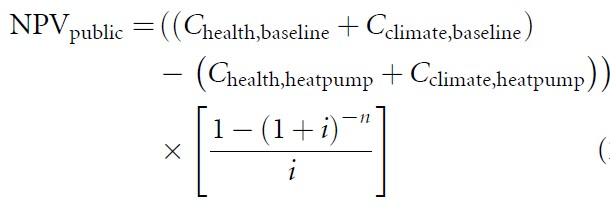

### PUBLIC NPV: WHOLE-HOME

In [ ]:
print("""
-------------------------------------------------------------------------------------------------------
print("Public NPV: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
""")

df_euss_am_mp8_home = calculate_public_npv(df=df_euss_am_mp8_home,
                                           interest_rate=0.07,
                                           grid_decarb=False
                                          )
df_euss_am_mp8_home

## Private Perspective: Annual Energy Costs

In [ ]:
print("\n")
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Annual Energy Costs
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Obtain Level Energy Fuel Cost Data from the EIA
- Step 2: Calculate Annual Operating (Fuel) Costs
------------------------------------------------------------------------------------------------------------------------------------------------
""")

### Post-Retrofit (MP) Fuel Cost: WHOLE-HOME

In [ ]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Fuel Cost: WHOLE-HOME
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# calculate_annual_fuelCost(df, state_region, df_fuelPrices_perkWh, cpi_ratio)
df_euss_am_mp8_home = calculate_annual_fuelCost(df=df_euss_am_mp8_home,
                                                state_region=input_state,
                                                df_fuelPrices_perkWh=df_fuelPrices_perkWh,
                                                cpi_ratio=cpi_ratio_2021_2018        
                                               )
df_euss_am_mp8_home

## Private Perspective: Private NPV

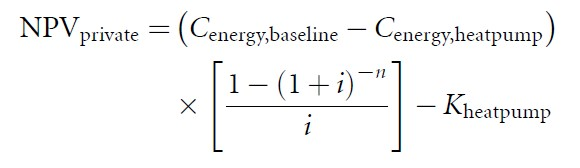

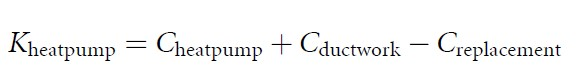

In [ ]:
print("\n")
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Private Perspective: Private NPV
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Calculate annual operating (fuel) costs
- Step 2: Calculate equipment capital costs (For space heating, include ductwork and weatherization (MP9 and MP8))
- Step 3: Calculate replacement cost (replacing existing piece of eqipment with similar technology)
- Step 4: Calculate net equipment capital costs
- Step 5: Calculate private NPV
------------------------------------------------------------------------------------------------------------------------------------------------
""")

In [ ]:
# Collect Capital Cost Data for different End-uses
filename = "tare_retrofit_costs_range.xlsx"
relative_path = os.path.join(r"retrofit_costs", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

df_heating_retrofit_costs = pd.read_excel(io=file_path, sheet_name='heating_costs')
df_waterHeating_retrofit_costs = pd.read_excel(io=file_path, sheet_name='waterHeating_costs')
df_clothesDrying_retrofit_costs = pd.read_excel(io=file_path, sheet_name='clothesDrying_costs')
df_cooking_retrofit_costs = pd.read_excel(io=file_path, sheet_name='cooking_costs')
df_enclosure_retrofit_costs = pd.read_excel(io=file_path, sheet_name='enclosure_upgrade_costs')

In [ ]:
# Adjust for regional cost differences with RSMeans
filename = "rsMeans_cityCostIndex.csv"
relative_path = os.path.join(r"inflation_data", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

df_rsMeans_cityCostIndex = pd.read_csv(file_path)

df_rsMeans_cityCostIndex = pd.DataFrame({
    'State': df_rsMeans_cityCostIndex['State'],
    'City': df_rsMeans_cityCostIndex['City'],
    'Material': (df_rsMeans_cityCostIndex['Material'] * (cpi_ratio_2021_2019)).round(2),
    'Installation': (df_rsMeans_cityCostIndex['Installation'] * (cpi_ratio_2021_2019)).round(2),
    'Average': (df_rsMeans_cityCostIndex['Average'] * (cpi_ratio_2021_2019)).round(2),
    'unit': '[$USD-2021]'
})
df_rsMeans_cityCostIndex

In [ ]:
# Assuming df_rsMeans_cityCostIndex is your DataFrame with average costs
# Accounts for the costs of materials, labor and equipment and compares it to a national average of 30 major U.S. cities
average_cost_map = df_rsMeans_cityCostIndex.set_index('City')['Average'].to_dict()
rsMeans_national_avg = round((3.00 * (cpi_ratio_2021_2019)), 2)

# Use CCI to adjust for cost differences when compared to the national average
# Call the function and map the values for CCI adjustment
df_euss_am_mp8_home['rsMeans_CCI_avg'] = df_euss_am_mp8_home['city'].apply(map_average_cost)
df_euss_am_mp8_home

### Space Heating and No Enclosure Upgrade

#### Space Heating Capital Costs

In [ ]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Space Heating
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
    'cost_per_kBtuh_progressive', 'cost_per_kBtuh_reference', 'cost_per_kBtuh_conservative',
    'otherCost_progressive', 'otherCost_reference', 'otherCost_conservative'
]

# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_heating_retrofit_costs[column] = round((df_heating_retrofit_costs[column] * df_heating_retrofit_costs['cpi_ratio'] * df_heating_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_heating_equipment_cost = df_heating_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_heating_equipment_cost

In [ ]:
# Call the function and obtain equipment specifications
# obtain_heating_system_specs(df)
df_euss_am_mp8_home = obtain_heating_system_specs(df_euss_am_mp8_home)

# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_installation_cost(df_euss_am_mp8_home, dict_heating_equipment_cost, rsMeans_national_avg, menu_mp, 'heating')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_replacement_cost(df_euss_am_mp8_home, dict_heating_equipment_cost, rsMeans_national_avg, menu_mp, 'heating')

# Call the function and calculate installation premium based on existing housing characteristics
# calculate_heating_installation_premium(df, rsMeans_national_avg, cpi_ratio_2021_2013)
df_euss_am_mp8_home = calculate_heating_installation_premium(df_euss_am_mp8_home, rsMeans_national_avg, cpi_ratio_2021_2013)

# Display the df
df_euss_am_mp8_home

### Water Heating

In [ ]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Water Heating
------------------------------------------------------------------------------------------------------------------------------------------------
""")

cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
    'cost_per_gallon_progressive', 'cost_per_gallon_reference', 'cost_per_gallon_conservative',
]

# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_waterHeating_retrofit_costs[column] = round((df_waterHeating_retrofit_costs[column] * df_waterHeating_retrofit_costs['cpi_ratio'] * df_waterHeating_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_waterHeating_equipment_cost = df_waterHeating_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_waterHeating_equipment_cost

In [ ]:
# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_installation_cost(df_euss_am_mp8_home, dict_waterHeating_equipment_cost, rsMeans_national_avg, menu_mp, 'waterHeating')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_replacement_cost(df_euss_am_mp8_home, dict_waterHeating_equipment_cost, rsMeans_national_avg, menu_mp, 'waterHeating')

# Display the df
df_euss_am_mp8_home

### Clothes Drying

In [ ]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Clothes Drying
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
]
 
# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_clothesDrying_retrofit_costs[column] = round((df_clothesDrying_retrofit_costs[column] * df_clothesDrying_retrofit_costs['cpi_ratio'] * df_clothesDrying_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_clothesDrying_equipment_cost = df_clothesDrying_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_clothesDrying_equipment_cost

In [ ]:
# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_installation_cost(df_euss_am_mp8_home, dict_clothesDrying_equipment_cost, rsMeans_national_avg, menu_mp, 'clothesDrying')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_replacement_cost(df_euss_am_mp8_home, dict_clothesDrying_equipment_cost, rsMeans_national_avg, menu_mp, 'clothesDrying')

# Display the df
df_euss_am_mp8_home

### Cooking

In [ ]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Cooking
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
]
 
# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_cooking_retrofit_costs[column] = round((df_cooking_retrofit_costs[column] * df_cooking_retrofit_costs['cpi_ratio'] * df_cooking_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_cooking_equipment_cost = df_cooking_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_cooking_equipment_cost

In [ ]:
# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_installation_cost(df_euss_am_mp8_home, dict_cooking_equipment_cost, rsMeans_national_avg, menu_mp, 'cooking')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
calculate_replacement_cost(df_euss_am_mp8_home, dict_cooking_equipment_cost, rsMeans_national_avg, menu_mp, 'cooking')

# Display the df
df_euss_am_mp8_home

## Private NPV Calculation for Whole Home

In [ ]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Calculate Private NPV for WHOLE-HOME
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# Assume 15 year lifetime and 7% discount rate
# calculate_private_NPV(df, interest_rate, ira_rebates=False)
df_euss_am_mp8_home = calculate_private_NPV(df=df_euss_am_mp8_home,
                                            interest_rate=0.07,
                                            ira_rebates=False
                                           )
df_euss_am_mp8_home

## Determine Adoption Decision for WHOLE-HOME

In [ ]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption without IRA Rebates
------------------------------------------------------------------------------------------------------------------------------------------------
""")

# adoption_decision(df, category, upgrade_column, ira_rebates=False, grid_decarb=False)
df_euss_am_mp8_home = adoption_decision(df=df_euss_am_mp8_home,
                                        ira_rebates=False, 
                                        grid_decarb=False
                                       )
df_euss_am_mp8_home

In [ ]:
# # check_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp8_home,
#                            category = 'heating',
#                            upgrade_column = 'upgrade_hvac_heating_efficiency'
#                           )

In [ ]:
# # check_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp8_home,
#                                category = 'waterHeating',
#                                upgrade_column = 'upgrade_water_heater_efficiency'
#                               )

In [ ]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'clothesDrying',
#                   upgrade_column = 'upgrade_clothes_dryer'
#                  )

In [ ]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'cooking',
#                   upgrade_column = 'upgrade_cooking_range'
#                  )

# Electrification: Basic Retrofit

## WHOLE-HOME Retrofit Adoption Rate with IRA Rebates
### Scenario Basic-IRA: Basic Retrofit (MP8), IRA Rebates, Current Grid

In [ ]:
# Measure Package 8
scenario_name = 'Basic-IRA'
cost_scenario = 'IRA Rebates'
grid_scenario = 'Current Electricity Grid'

print(f"""
-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario {scenario_name}:
Basic Retrofit: Measure Package {menu_mp}
{cost_scenario}
{grid_scenario}
-------------------------------------------------------------------------------------------------------
""")

In [ ]:
# # Collect Area Median Income Data at PUMA-resolution
# filename = "nhgis0002_ds239_20185_puma.csv"
# relative_path = os.path.join(r"equity_data", filename)
# file_path = os.path.join(project_root, relative_path)

# print(f"Retrieved data for filename: {filename}")
# print(f"Located at filepath: {file_path}")
# print("\n")

# df_county_medianIncome = pd.read_csv(file_path, encoding='ISO-8859-1')
# df_county_medianIncome = df_county_medianIncome.drop(0)
# df_county_medianIncome = df_county_medianIncome.reset_index(drop=True)

# cols_interest = ['GISJOIN', 'STUSAB', 'STATE', 'PUMAA', 'GEOID', 'NAME_E', 'AJZAE001', 'AJZAM001']
# df_county_medianIncome = df_county_medianIncome[cols_interest]
# df_county_medianIncome = df_county_medianIncome.rename(columns={"GISJOIN": "gis_joinID_puma", "STUSAB": "state_abbrev", "STATE": "state", "PUMAA": "puma_code", "GEOID": "census_geoID", "NAME_E": "name_estimate", "AJZAE001": "median_income_USD2018", "AJZAM001": "median_income_USD2018_marginOfError"})
# df_county_medianIncome

### WHOLE-HOME Retrofit Adoption with IRA Rebates

In [ ]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption with IRA Rebates
------------------------------------------------------------------------------------------------------------------------------------------------
""")

In [ ]:
# Determine Percent AMI and Rebate Amounts
# Create a copy of the results df and define it as results_IRA
# This needs to be done before running the calculate_percent_AMI function
df_euss_am_mp8_home = df_euss_am_mp8_home.copy()

# calculate_percent_AMI(df_results_IRA, df_county_medianIncome):
df_euss_am_mp8_home = calculate_percent_AMI(df_euss_am_mp8_home, df_county_medianIncome)

print("Calculating rebate amounts for Space Heating ...")
calculate_rebateIRA(df_euss_am_mp8_home, "heating", menu_mp)

print("Calculating rebate amounts for Water Heating ...")
calculate_rebateIRA(df_euss_am_mp8_home, "waterHeating", menu_mp)

print("Calculating rebate amounts for Clothes Drying ...")
calculate_rebateIRA(df_euss_am_mp8_home, "clothesDrying", menu_mp)

print("Calculating rebate amounts for Cooking ...")
calculate_rebateIRA(df_euss_am_mp8_home, "cooking", menu_mp)

In [ ]:
print("Calculating Private NPV for each end-use ...")

# Assume 15 year lifetime and 7% discount rate
# calculate_private_NPV(df, interest_rate, ira_rebates=False)
df_euss_am_mp8_home = calculate_private_NPV(df=df_euss_am_mp8_home,
                                            interest_rate=0.07,
                                            ira_rebates=True
                                           )
df_euss_am_mp8_home

In [ ]:
print("Determining Adoption Decision for each end-use ...")

# adoption_decision(df, category, upgrade_column, ira_rebates=False, grid_decarb=False)
df_euss_am_mp8_home = adoption_decision(df=df_euss_am_mp8_home,
                                        ira_rebates=True, 
                                        grid_decarb=False
                                       )
df_euss_am_mp8_home

In [ ]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'heating',
#                   upgrade_column = 'upgrade_hvac_heating_efficiency'
#                  )

In [ ]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                                category = 'waterHeating',
#                                upgrade_column = 'upgrade_water_heater_efficiency'
#                               )

In [ ]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'clothesDrying',
#                   upgrade_column = 'upgrade_clothes_dryer'
#                  )

In [ ]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'cooking',
#                   upgrade_column = 'upgrade_cooking_range'
#                  )

# Electricity Grid Decarbonization Scenarios

"Since the lifetime of a heat pump is 15 years [31, 32], we assume that emissions will diminish in all US electric grids during the life of the heat pump. To capture this effect, we use electric grid emissions projections from EPRI's National Electrification Assessment [16]. We use that study's 'Progressive' scenario (a balance between the study's 'Conservative' and 'Transformative' scenarios) to assume that from 2017 to 2032, (a) coal energy will decline by 75% from 1200 TWh to 300 TWh and (b) CO2 emissions intensity will decline by 45% from 850 lbs MWh−1 to 450 lbs MWh−1. We assume that the majority of health damages from coal energy [33]. Thus, we assume for each grid region that health damages will decline by 75% and CO2 emissions by 45% by 2032. We assume a linear trend."

15 year period from 2017 to 2032. Then levels off after 2032. 
- 75% health damage reduction / 15 years = 5%/year
- 45% CO2 emissions reduction / 15 years = 3%/year

In [ ]:
# Measure Package 8
scenario_name = 'Basic-IRA-Decarb'
cost_scenario = 'IRA Rebates'
grid_scenario = 'Gradually Decarbonizing Grid'

print(f"""
-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario {scenario_name}:
Basic Retrofit: Measure Package {menu_mp}
{cost_scenario}
{grid_scenario}
-------------------------------------------------------------------------------------------------------
""")

In [ ]:
# pd.set_option("display.max_columns", None)
# # pd.reset_option('display.max_columns')
# # pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

# Scenario Basic-IRA-Decarb: 
# Basic Retrofit (MP8), IRA Rebates, Gradually Decarbonizing Grid
**Steps**:
- Private Perspective Impacts do not change with the Decarbonizing Grid
- Public Perspective Impacts do change:
    - Emissions and damages from pollutants changes with a gradually decarbonizing grid
    - Updated Public NPV (gridDecarb) value and function
    - Update Net NPV (ira_gridDecarb)
    - Updated Adoption Rate (ira_gridDecarb)

## IRA, Grid Decarb: Public NPV and Adoption Rate

In [ ]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Home Retrofit Adoption with IRA Rebates and Decarbonizing Grid
------------------------------------------------------------------------------------------------------------------------------------------------
""")

In [ ]:
print("Calculating Marginal Damages for each end-use ...")

# calculate_marginal_damages(df, grid_decarb=False)
df_euss_am_mp8_home = calculate_marginal_damages(df=df_euss_am_mp8_home,
                                                 grid_decarb=True)
df_euss_am_mp8_home

In [ ]:
print("Calculating Public NPV for each end-use ...")
df_euss_am_mp8_home = calculate_public_npv(df=df_euss_am_mp8_home,
                                           interest_rate=0.07,
                                           grid_decarb=True
                                          )
df_euss_am_mp8_home

In [ ]:
print("Determining Adoption Decision for each end-use ...")

# adoption_decision(df, category, upgrade_column, ira_rebates=False, grid_decarb=False)
df_euss_am_mp8_home = adoption_decision(df=df_euss_am_mp8_home,
                                        ira_rebates=True, 
                                        grid_decarb=True
                                       )
df_euss_am_mp8_home

In [ ]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'heating',
#                   upgrade_column = 'upgrade_hvac_heating_efficiency'
#                  )

In [ ]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                                category = 'waterHeating',
#                                upgrade_column = 'upgrade_water_heater_efficiency'
#                               )

In [ ]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'clothesDrying',
#                   upgrade_column = 'upgrade_clothes_dryer'
#                  )

In [ ]:
# # check_ira_adoption_consistency(df, category, upgrade_column)
# check_ira_adoption_consistency(df = df_euss_am_mp8_home,
#                   category = 'cooking',
#                   upgrade_column = 'upgrade_cooking_range'
#                  )

# Model Runtime

In [ ]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")

In [ ]:
# %whos

In [ ]:
df_euss_am_mp8_home['water_heater_efficiency'].value_counts()